# Data Analysis and Data Visualization

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv("/Users/saan/Downloads/house_data.csv")

The data has been further updated to fit the project

In [82]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long
0,221900.0,3,1.00,1180,5650,1.0,1180,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,2170,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,770,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,1050,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,1680,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,1530,47.6993,-122.346
21609,400000.0,4,2.50,2310,5813,2.0,2310,47.5107,-122.362
21610,402101.0,2,0.75,1020,1350,2.0,1020,47.5944,-122.299
21611,400000.0,3,2.50,1600,2388,2.0,1600,47.5345,-122.069


In [83]:
df_dupe = df

In [84]:
df_dupe.dtypes

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
sqft_above       int64
lat            float64
long           float64
dtype: object

In [85]:
df_dupe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   sqft_lot     21613 non-null  int64  
 5   floors       21613 non-null  float64
 6   sqft_above   21613 non-null  int64  
 7   lat          21613 non-null  float64
 8   long         21613 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 1.5 MB


In [86]:
df_dupe.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,1788.390691,47.560053,-122.213896
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,828.090978,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,1190.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,2210.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,47.777600,-121.315000


In [87]:
df_dupe.count()

price          21613
bedrooms       21613
bathrooms      21613
sqft_living    21613
sqft_lot       21613
floors         21613
sqft_above     21613
lat            21613
long           21613
dtype: int64

In [88]:
df_dupe.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
sqft_above     0
lat            0
long           0
dtype: int64

To begin, let's visualize the data in a heatmap

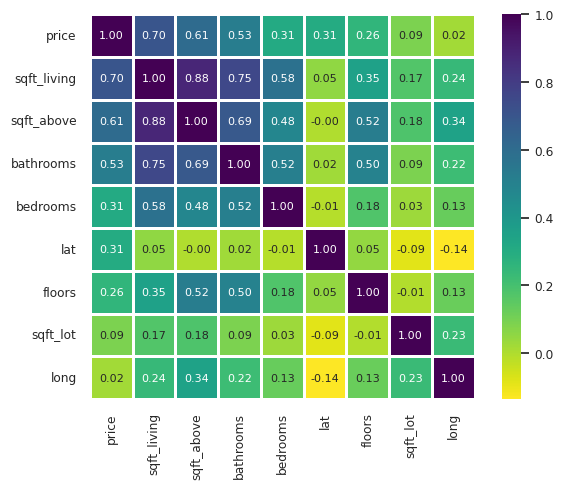

In [98]:
# price correlation matrix

corr = df.corr()
k = 10 #number of coulmns for heatmap
cols = corr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df_dupe[cols].values.T)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,5))
    sns.set(font_scale=0.8)
    ax = sns.heatmap(cm,cbar=True, square=True, annot=True,fmt='0.2f',linewidths=.8,
                     cmap="viridis_r", annot_kws={'size': 8}, yticklabels=cols.values,
                     xticklabels=cols.values)

Looks like price has a high correlation with sqft_living, sqft_above and a moderate correlation with the number of bathrooms.

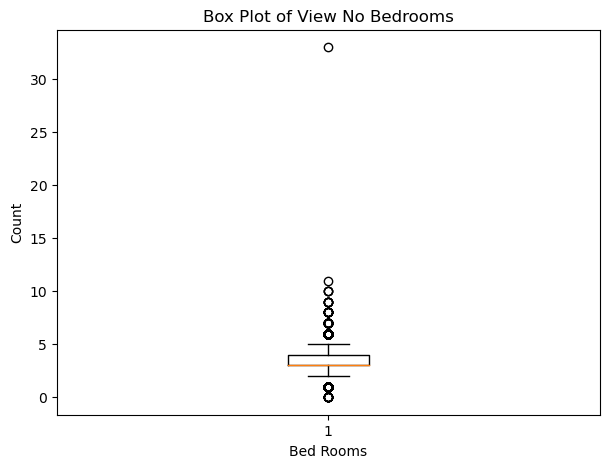

In [90]:
plt.figure(figsize=[7,5])
plt.boxplot(df_dupe['bedrooms'])

# Add labels and title
plt.xlabel('Bed Rooms')
plt.ylabel('Count')
plt.title('Box Plot of View No Bedrooms')

# Show the plot
plt.show()

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'floors'}>, <AxesSubplot:>]],
      dtype=object)

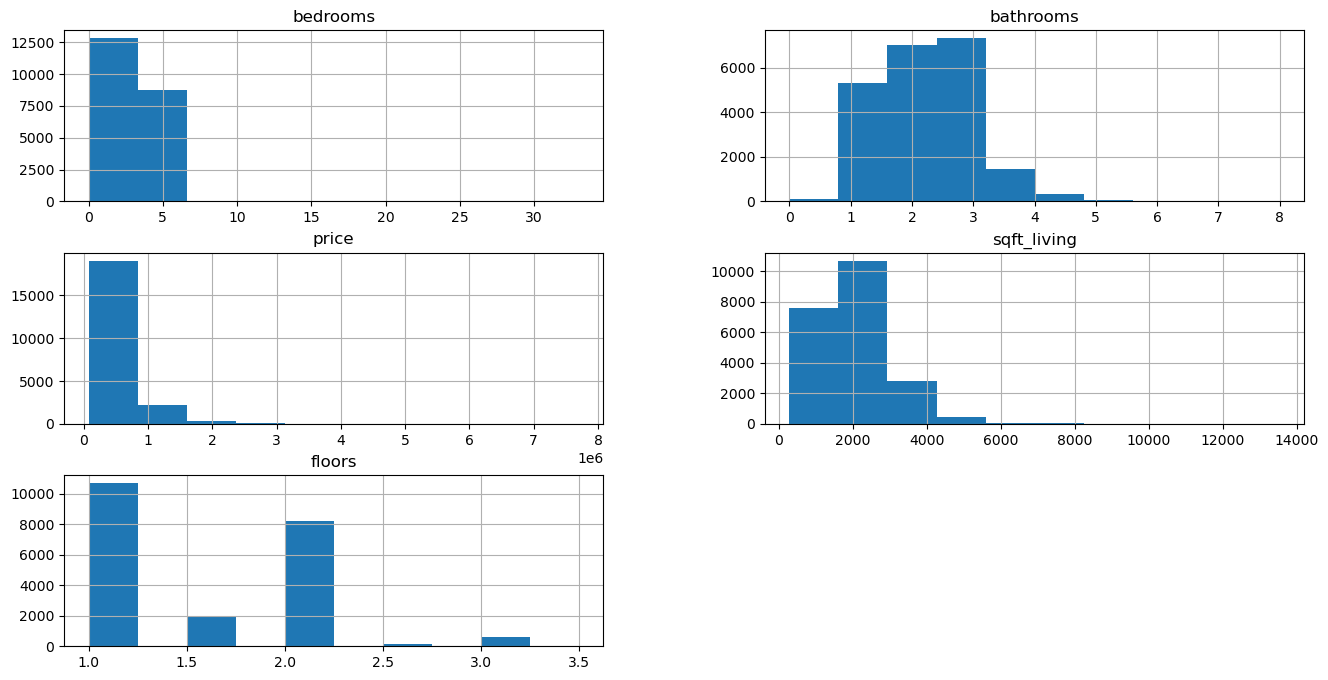

In [94]:
df_dupe[['bedrooms', 'bathrooms', 'price', 'sqft_living', 'floors']].hist(figsize=(16,8))

positively skewed data

(0.0, 8084107.430240165)

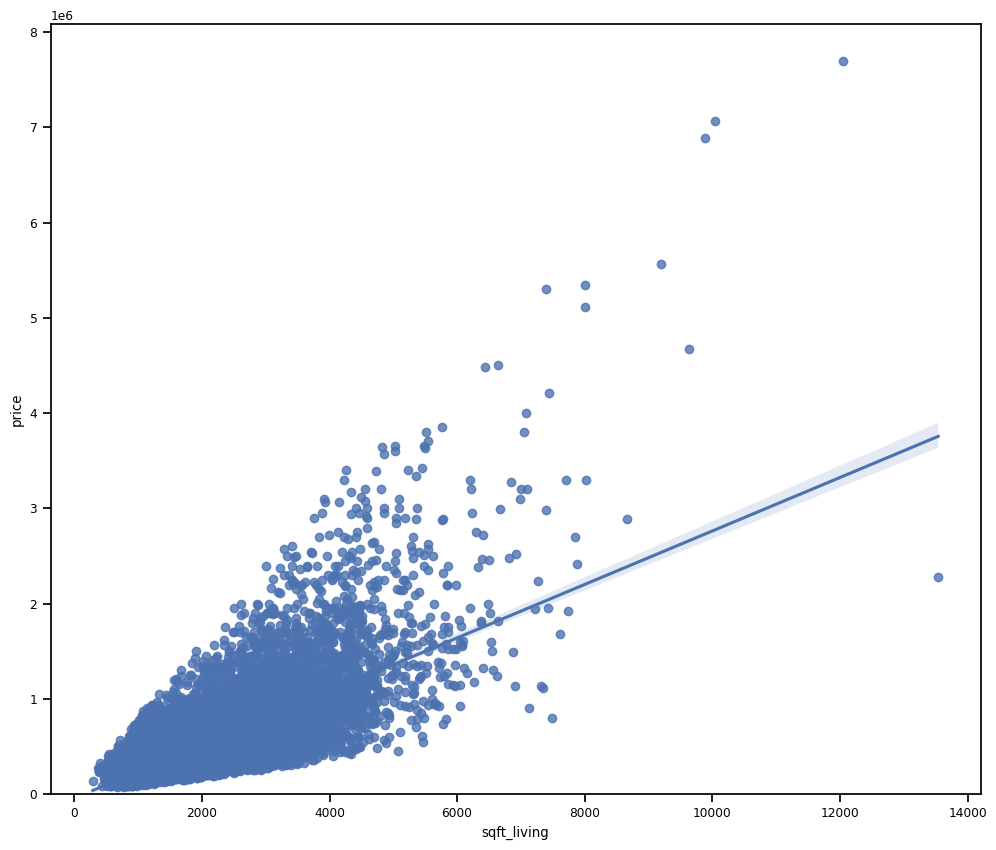

In [150]:
width = 12
height = 10
plt.figure(figsize=(width,height))

sns.regplot(x="sqft_living",y="price",data=df_dupe)
plt.ylim(0,)

/Users/saan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


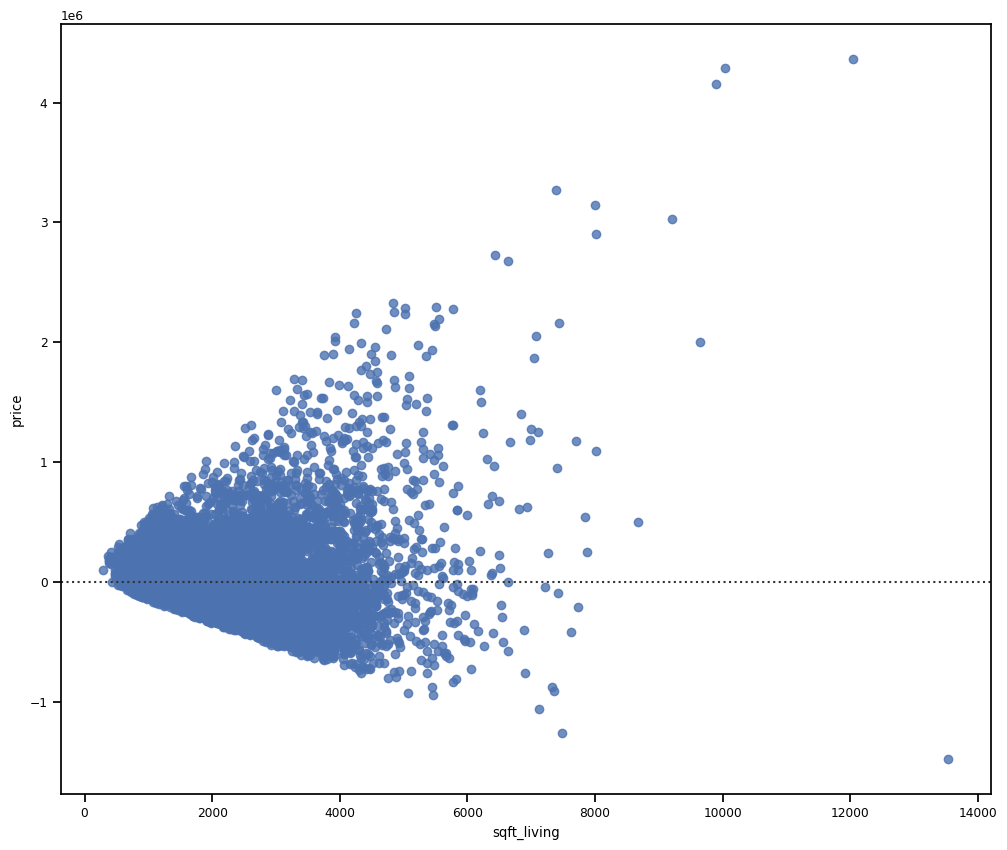

In [151]:
width = 12
height = 10
plt.figure(figsize=(width, height))

sns.residplot(df['sqft_living'], df['price'])
plt.show()

In [96]:
print("largest number of bedrooms in dataset = ",max(df_dupe['bedrooms']))

largest number of bedrooms in dataset =  33


# Model Development

In [106]:
X = df_dupe.drop(['price'],axis=1) #test data 

y = df_dupe['price']

In [133]:
# Splitting data first - 80% training, 20% testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)

In [134]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long
15166,4,4.00,3860,67953,2.0,3860,47.7469,-122.378
13416,4,2.00,1920,7803,1.0,1080,47.7580,-122.325
206,3,2.50,2440,4587,2.0,2440,47.7073,-122.114
4286,3,2.75,1910,15508,1.0,1210,47.3128,-122.345
18065,4,2.50,2130,9100,1.0,1290,47.3815,-122.169
...,...,...,...,...,...,...,...,...
1099,2,1.00,720,4222,1.0,720,47.4965,-122.186
18898,4,2.50,1820,9161,1.0,1220,47.4333,-122.168
11798,4,3.25,3440,7661,2.0,3440,47.5429,-121.995
6637,2,1.50,870,747,2.0,800,47.6967,-122.342


In [135]:
print("Test Data = ",x_test.shape)
print("Train Data = ",x_train.shape)
print("Target Train = ",y_train.shape)
print("Target Test = ",y_test.shape)

Test Data =  (4323, 8)
Train Data =  (17290, 8)
Target Train =  (17290,)
Target Test =  (4323,)


In [136]:
from sklearn.preprocessing import StandardScaler 

std_scale = StandardScaler()
X_train = std_scale.fit_transform(x_train)

X_test = std_scale.transform(x_test)


In [137]:
X_train

array([[ 0.68095813,  2.45689305,  1.95989432, ...,  2.52319393,
         1.34993731, -1.16066213],
       [ 0.68095813, -0.14628777, -0.16820792, ..., -0.85396514,
         1.4302186 , -0.78506344],
       [-0.39309461,  0.50450743,  0.40221123, ...,  0.79817023,
         1.06352838,  0.71024455],
       ...,
       [ 0.68095813,  1.48070024,  1.49917115, ...,  2.01297565,
        -0.12550262,  1.55356991],
       [-1.46714735, -0.79708298, -1.32001584, ..., -1.19411066,
         0.98686336, -0.90553849],
       [-0.39309461,  0.50450743,  0.819056  , ...,  1.25979629,
        -0.05028412,  1.57483021]])

In [138]:
X_test

array([[ 0.68095813,  0.17910983,  0.36930244, ..., -0.39233908,
         0.90151929, -1.14648859],
       [-0.39309461, -0.79708298,  0.10603206, ..., -0.79322487,
         0.50951515,  0.89450051],
       [-1.46714735, -1.44787818, -0.68377908, ..., -0.40448714,
         0.9557634 , -0.75671637],
       ...,
       [ 0.68095813,  0.50450743,  0.63257282, ...,  1.05327937,
        -1.38107307,  0.60394304],
       [-1.46714735, -1.44787818, -1.37486383, ..., -1.16981455,
        -0.08933988, -1.20318274],
       [ 0.68095813,  0.82990504, -0.28887351, ...,  0.03284282,
        -1.39915445, -0.67876192]])

To find the best model type for this data, I will train different types of models and compare to get the best result

### Linear Regression Model

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [140]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [141]:
yhat = lr.predict(X_test) # prediction

In [142]:
yhat

array([731399.04463833, 564112.63357847, 533240.6289404 , ...,
       538595.18292614, 258881.67789214, 349846.70125078])

In [143]:
# Finding Rscore and MSE

print('lr r2_score :', r2_score(y_test, yhat))
print('lr mse :', mean_squared_error(y_test, yhat))


lr r2_score : 0.5980197935493716
lr mse : 56119732690.50524


In [148]:
print(lr.score(X_test, y_test)*100,"%")

59.80197935493716 %


### Random Forest Model

In [145]:
from sklearn.ensemble import RandomForestRegressor

rfg_model = RandomForestRegressor()
rfg_model.fit(X_train, y_train)

RandomForestRegressor()

In [146]:
print('lr r2_score :', r2_score(y_test, yhat))
print('lr mse :', mean_squared_error(y_test, yhat))

lr r2_score : 0.5980197935493716
lr mse : 56119732690.50524


In [147]:
print(rfg_model.score(X_test, y_test)*100,"%")

82.02553068073512 %


### The Random Forest Model results in an 82% accuracy!

In [162]:
#from sklearn.model_selection import  GridSearchCV

#param = {
#    'n_estimators' : [25, 50, 100],
#    'max_depth' : [8, 16, 32],
#    'min_samples_split' : [5]
#}

#grid_search = GridSearchCV(rfg_model, param, cv=5,
#                          scoring = 'neg_mean_squared_error',
#                          return_train_score = True)
#
#grid_search.fit(X_train, y_train)